In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

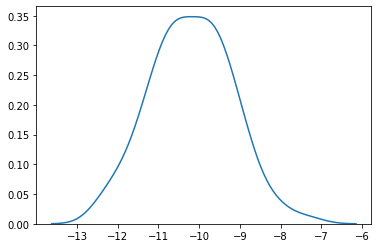

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0645: 100%|██████████| 1500/1500 [00:05<00:00, 280.91it/s]


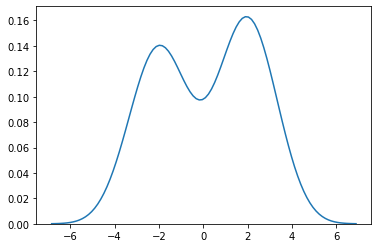

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-3.67069   ,  1.5543034 ,  2.4083102 ,  1.1671195 ,
              1.7276477 , -2.5935674 , -2.121836  ,  2.4692879 ,
             -1.6626297 , -1.7436241 , -0.00539189,  1.0735145 ,
             -0.05758016, -2.8775332 , -1.331906  , -2.2196012 ,
             -2.7086005 ,  1.4703662 , -1.0380907 ,  0.14051609,
             -2.733738  ,  2.044404  , -1.8627032 ,  3.039868  ,
             -1.3631648 , -2.552978  ,  3.2731965 ,  2.2298956 ,
             -1.1286532 ,  2.8080084 ,  1.9566033 ,  2.7300968 ,
              2.0994854 , -2.9778204 ,  0.8645474 ,  0.7796176 ,
              0.50631374,  0.96288043, -1.5870155 ,  1.1033831 ,
              3.4446328 ,  1.3710513 ,  1.8138139 ,  3.7996562 ,
              1.6358749 , -2.8320053 ,  0.5103831 , -2.223269  ,
             -1.7324963 , -1.5669291 , -1.2803717 ,  2.5726483 ,
              1.3112051 ,  1.5415303 ,  2.4244595 , -0.70003134,
              3.1424031 , -1.4830022 ,  2.8974485 ,  3.3370895 ,
             -3.0328264 ,